In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib

In [9]:
def feecal(value,fee_rate,rem):
    fee = 0
    g = value
    lor = 0
    
    rate = fee_rate[['upr',rem]]
    rate.columns = ['upr', 'rate']
    
    for fr in rate.itertuples():
        if value <= fr.upr:
            fee = fee + g * fr.rate
            break
        else:
            fee = fee + (fr.upr - lor) * fr.rate
            g = value - fr.upr
            lor = fr.upr
    return fee

In [5]:
wrap = [{'product': 'GRAN GOAL', 'filename': 'feerate_gg.csv'}, 
        {'product': 'ダイワファンドラップ', 'filename': 'feerate_daiwa.csv'},
        {'product': 'ダイワファンドラップ プレミアム', 'filename': 'feerate_daiwapre.csv'},
        {'product': 'ファーストステップ', 'filename': 'feerate_mizuhofs.csv'},
        {'product': 'マイ・ゴール', 'filename': 'feerate_mizuhomg.csv'},
        {'product': '日興ファンドラップ一任型', 'filename': 'feerate_nikko.csv'}, 
        {'product': '三井住友信託ファンドラップ', 'filename': 'feerate_smtb.csv'},
        {'product': 'MUFGファンドラップ', 'filename': 'feerate_mutb.csv'},
        {'product': '水戸ファンドラップ', 'filename': 'feerate_mito.csv'},
        {'product': 'Dream Collection', 'filename': 'feerate_ichi.csv'}
       ]

In [13]:
gs = pd.DataFrame(np.arange(100)*10000000+10000000, columns=['ganpon'])
for w in wrap:
    fee_rate = pd.read_table(w['filename'])
    gs[w['product']] = 0
    for index, row in gs.iterrows():
        gs.at[index, w['product']] = feecal(gs.at[index, 'ganpon'],fee_rate,'const')
    gs[w['product']] = gs[w['product']]/gs['ganpon']

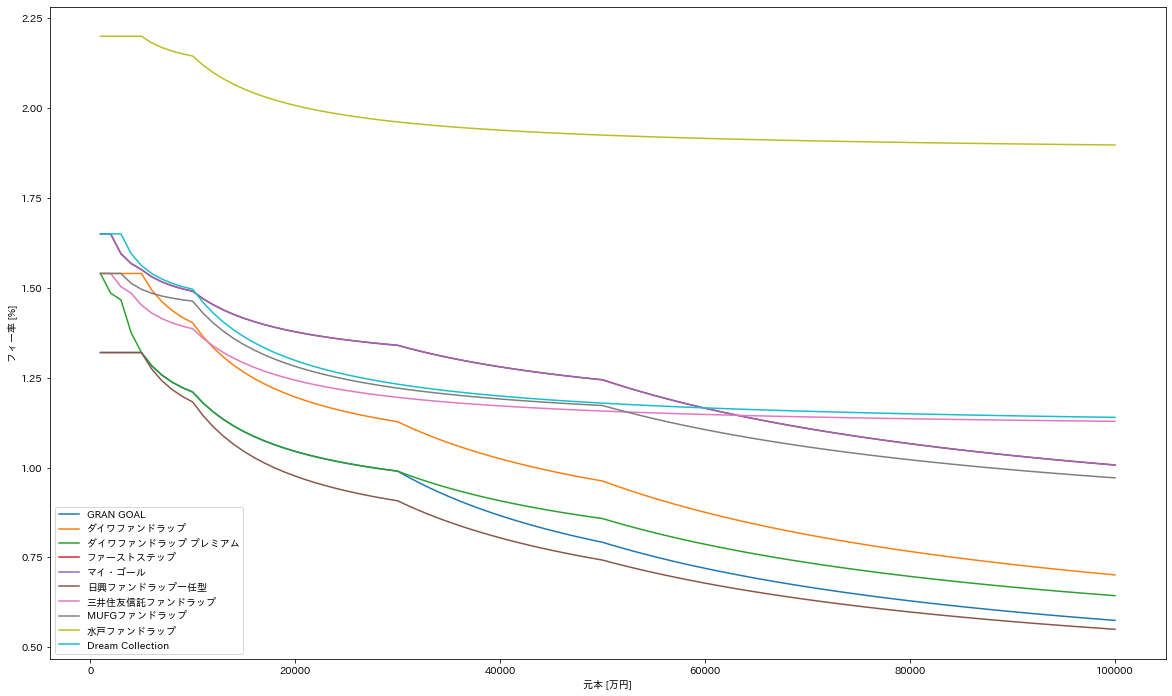

In [23]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, xlabel='元本 [万円]', ylabel='フィー率 [%]')

for w in wrap:
    ax.plot(gs['ganpon']/10000,gs[w['product']]*100)

ax.legend(gs.columns.values[1:],loc='best')

In [22]:
print(gs.columns.values[1:])

['GRAN GOAL' 'ダイワファンドラップ' 'ダイワファンドラップ プレミアム' 'ファーストステップ' 'マイ・ゴール'
 '日興ファンドラップ一任型' '三井住友信託ファンドラップ' 'MUFGファンドラップ' '水戸ファンドラップ'
 'Dream Collection']
